## Importing Data & Required Libraries

In [1]:
%pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, RFE, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE

np.random.seed(42)
warnings.filterwarnings("ignore")

In [3]:
# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'ID': 259, 'type': 'NATIVE', 'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'venue': 'Scientific Reports', 'year': 2021, 'journal': None, '

In [4]:
data = pd.concat([X,y], axis= 1)

## Exploratory Data Analysis (EDA)

In [5]:
data.head(10)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p
5,15.34,x,g,o,f,e,NaN,w,17.84,18.79,...,y,w,u,w,t,p,NaN,d,u,p
6,14.85,f,h,o,f,e,NaN,w,17.71,16.89,...,y,w,u,w,t,g,NaN,d,w,p
7,14.86,x,h,e,f,e,NaN,w,17.03,17.44,...,y,w,u,w,t,p,NaN,d,u,p
8,12.85,f,g,o,f,e,NaN,w,17.27,18.69,...,y,w,u,w,t,p,NaN,d,a,p
9,13.55,f,g,e,f,e,NaN,w,16.04,16.88,...,y,w,u,w,t,p,NaN,d,w,p


In [6]:
data.tail(10)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
61059,1.15,f,s,y,f,f,f,f,2.83,5.07,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61060,1.13,x,s,y,f,f,f,f,3.06,4.82,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61061,1.25,x,s,y,f,f,f,f,4.40,6.61,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61062,1.25,s,s,y,f,f,f,f,3.51,4.65,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61063,1.42,x,s,y,f,f,f,f,4.88,5.80,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,...,NaN,y,NaN,NaN,f,f,NaN,d,a,p
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
61068,1.17,s,s,y,f,f,f,f,3.25,5.45,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p


In [7]:
data.shape

(61069, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [9]:
data.describe(include= ["float64"])

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [10]:
data.describe(include= ["object"])

,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
count,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069,61069
unique,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4,2
top,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a,p
freq,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177,33888


In [11]:
for col in data.select_dtypes("object"):
    print(f"column {col} unique values are:\n{data[col].unique()}\n")

column cap-shape unique values are:
['x' 'f' 'p' 'b' 'c' 's' 'o']

column cap-surface unique values are:
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']

column cap-color unique values are:
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']

column does-bruise-or-bleed unique values are:
['f' 't']

column gill-attachment unique values are:
['e' nan 'a' 'd' 's' 'x' 'p' 'f']

column gill-spacing unique values are:
[nan 'c' 'd' 'f']

column gill-color unique values are:
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']

column stem-root unique values are:
['s' nan 'b' 'r' 'c' 'f']

column stem-surface unique values are:
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']

column stem-color unique values are:
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']

column veil-type unique values are:
['u' nan]

column veil-color unique values are:
['w' 'y' nan 'n' 'e' 'u' 'k']

column has-ring unique values are:
['t' 'f']

column ring-type unique values are:
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']

column 

In [12]:
for col in data.select_dtypes("object"):
    print(f"column {col} value counts propotional are:\n{data[col].value_counts(normalize= True, dropna= False)}\n")

column cap-shape value counts propotional are:
cap-shape
x    0.441042
f    0.219489
s    0.117310
b    0.093239
o    0.056657
p    0.042542
c    0.029720
Name: proportion, dtype: float64

column cap-surface value counts propotional are:
cap-surface
NaN    0.231214
t      0.134209
s      0.124580
y      0.103833
h      0.081449
g      0.077355
d      0.072574
e      0.042313
k      0.037711
i      0.036434
w      0.035206
l      0.023121
Name: proportion, dtype: float64

column cap-color value counts propotional are:
cap-color
n    0.396568
y    0.139891
w    0.125530
g    0.072377
e    0.066073
o    0.059867
r    0.029180
u    0.027985
p    0.027886
k    0.020944
b    0.020141
l    0.013558
Name: proportion, dtype: float64

column does-bruise-or-bleed value counts propotional are:
does-bruise-or-bleed
f    0.82659
t    0.17341
Name: proportion, dtype: float64

column gill-attachment value counts propotional are:
gill-attachment
a      0.207929
d      0.167794
NaN    0.161850
x      0.

In [13]:
data.isna().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0
stem-width,0


In [14]:
data.duplicated().sum()

np.int64(146)

In [15]:
def draw_count_plot(col):
    sns.countplot(data= data, x= col)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.title(f"Count plot to illustrate frequency distribution for column: {col}")
    plt.show();

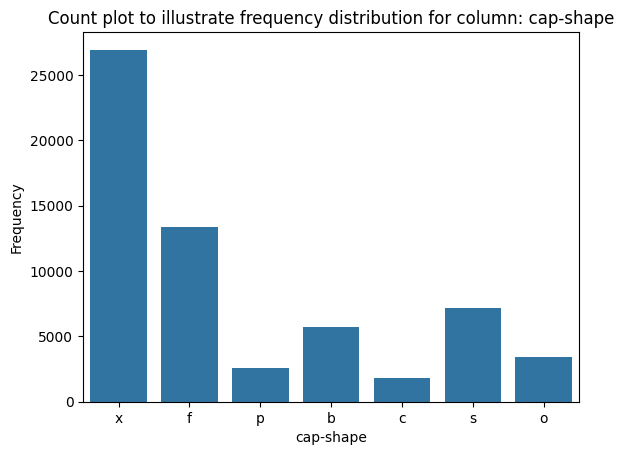

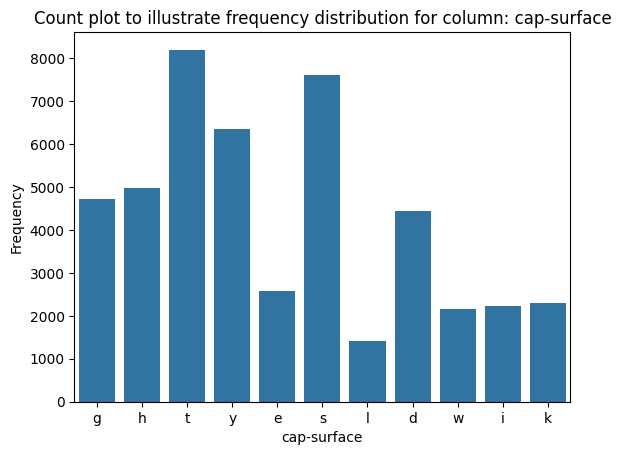

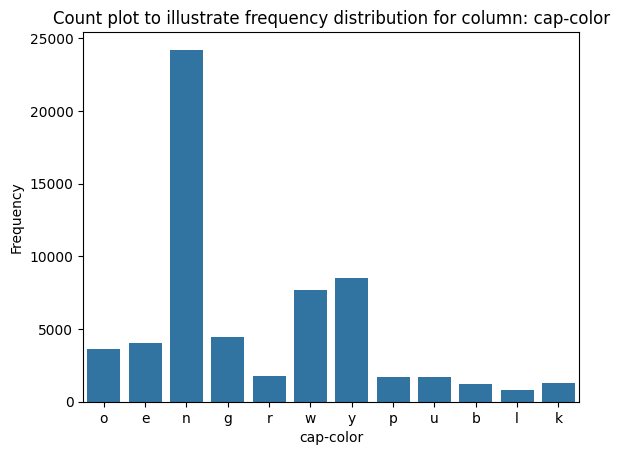

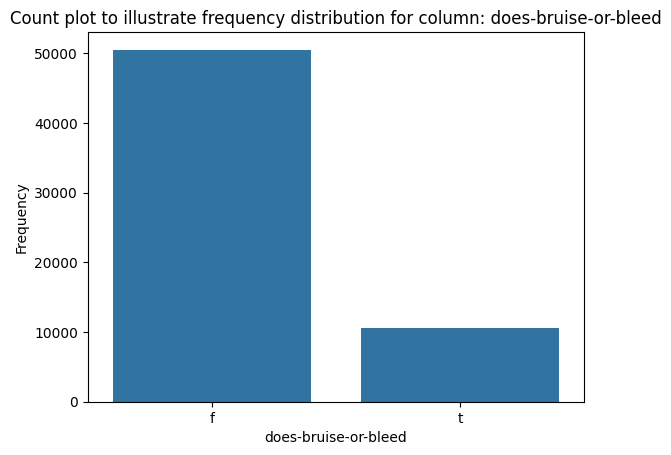

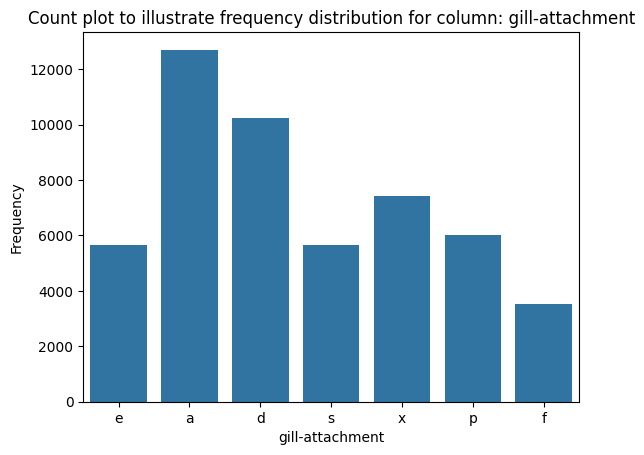

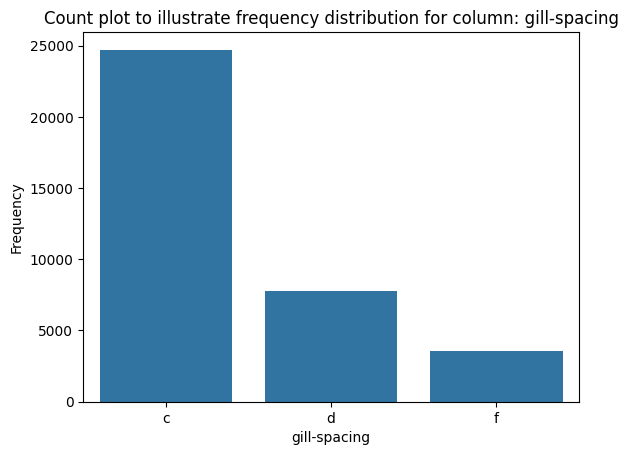

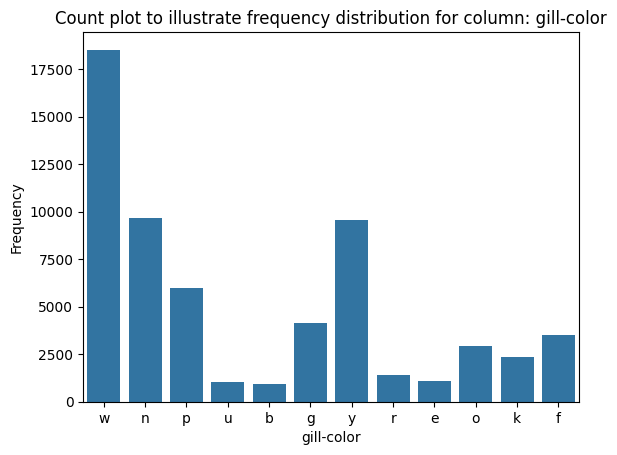

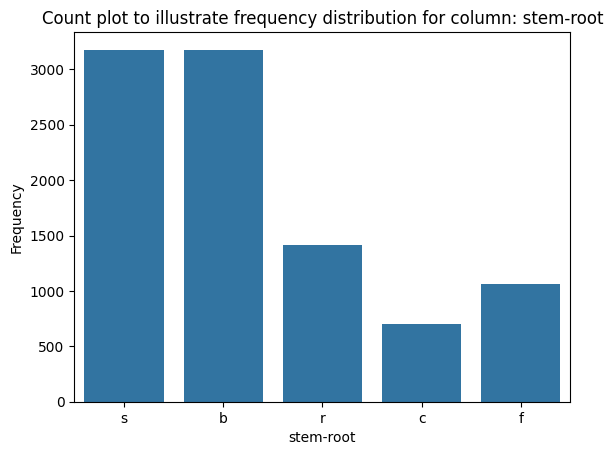

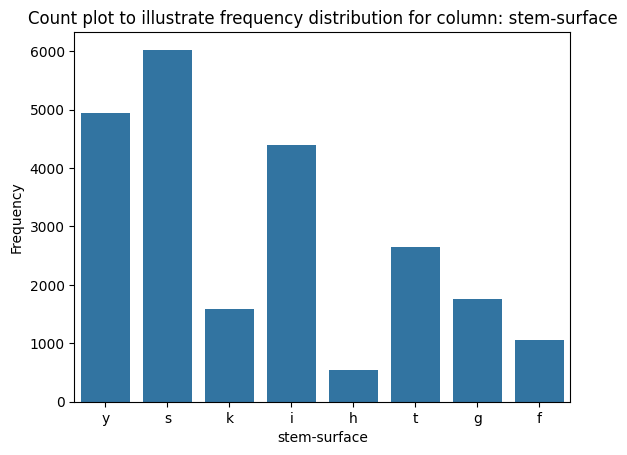

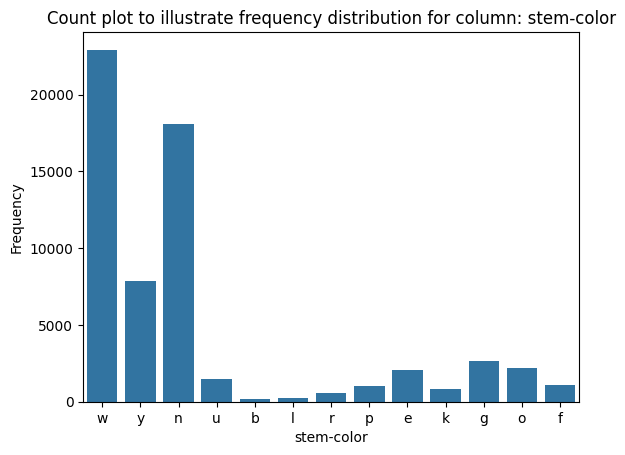

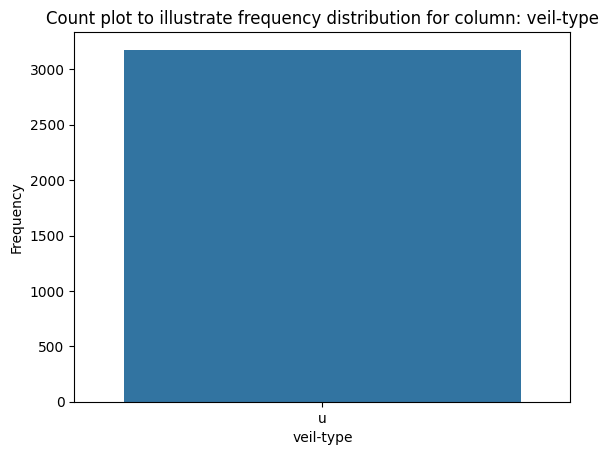

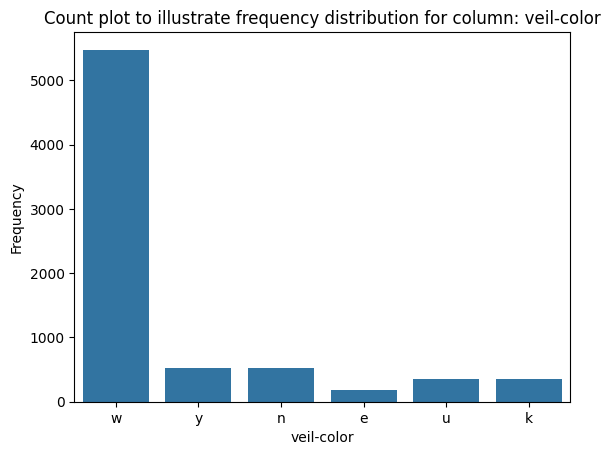

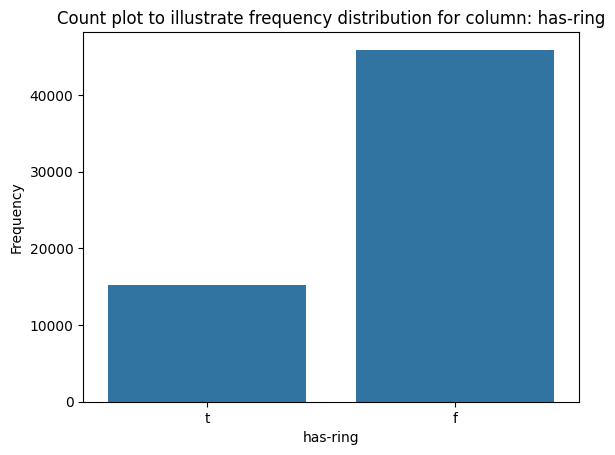

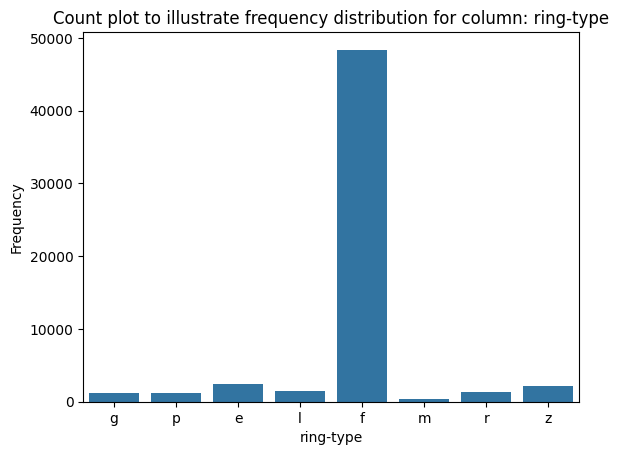

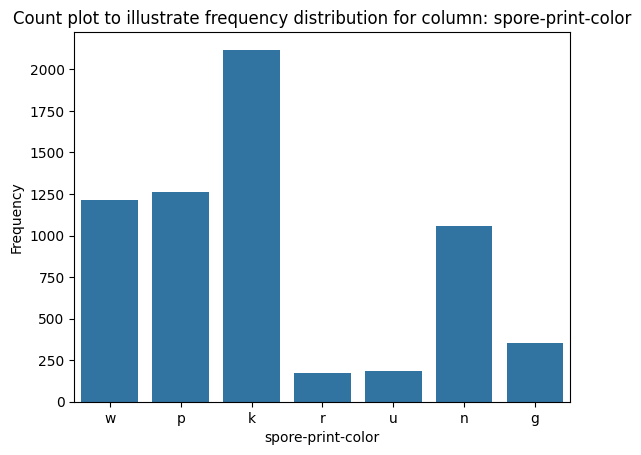

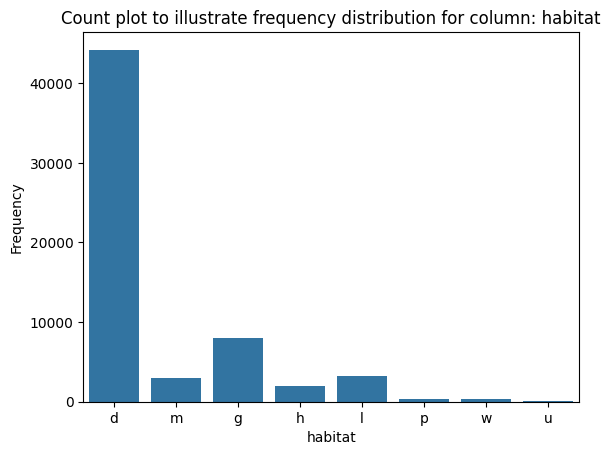

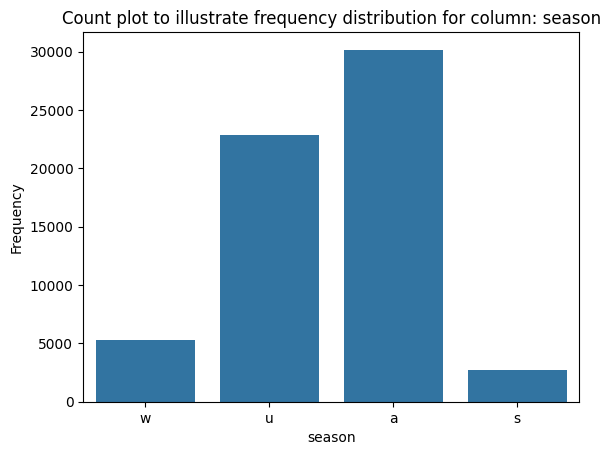

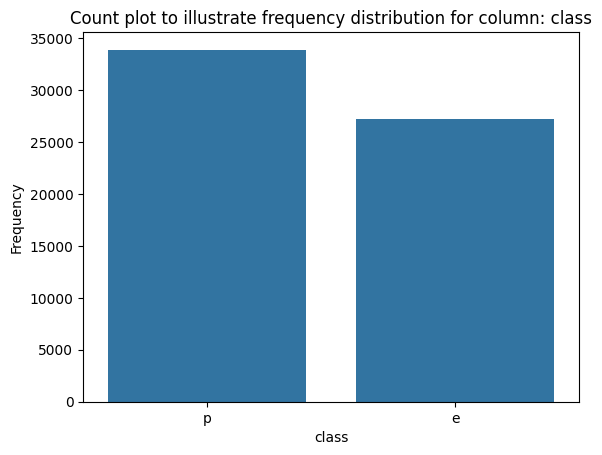

In [16]:
for col in data.select_dtypes("object"):
    draw_count_plot(col)

In [17]:
def draw_hist_plot(col):
    sns.histplot(data= data, x= col, kde= True)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.title(f"Histogram plot to illustrate frequency distribution for column: {col}")
    plt.show();

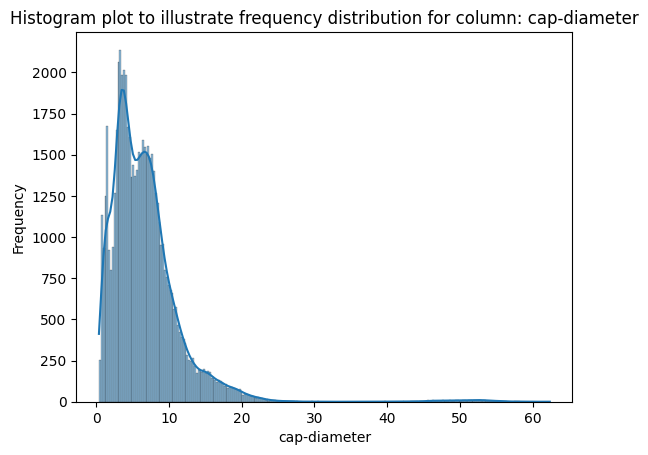

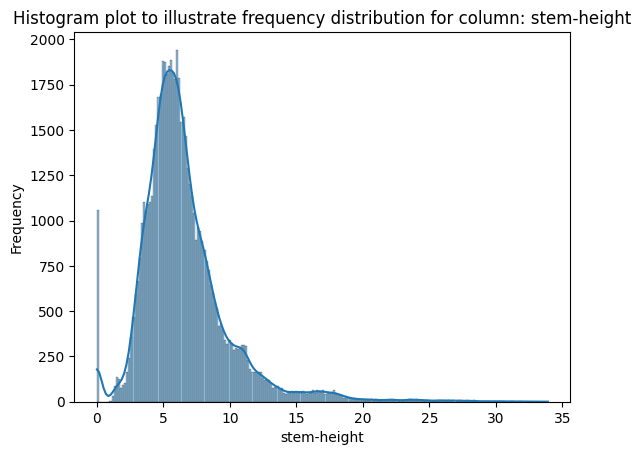

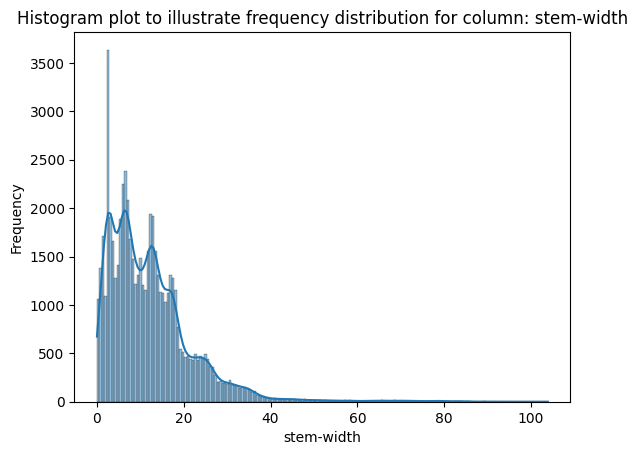

In [18]:
for col in data.select_dtypes("float64"):
    draw_hist_plot(col)

In [19]:
def draw_boxen_plot(col):
    sns.boxenplot(data= data, x= col)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.title(f"Boxen plot for column: {col}")
    plt.show();

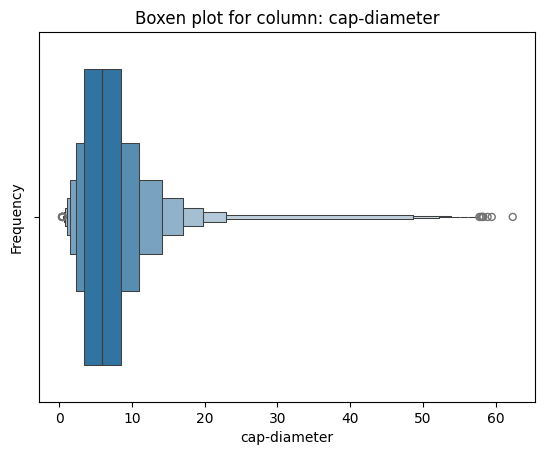

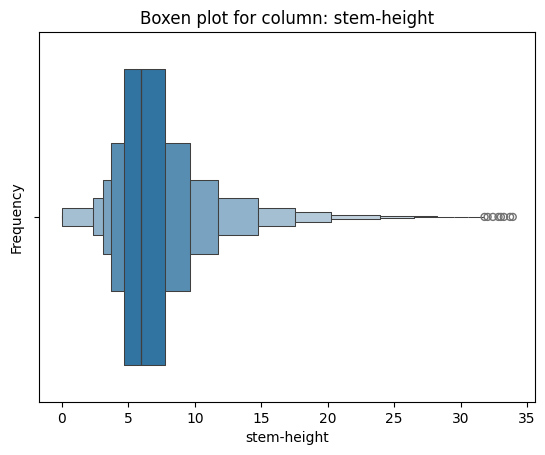

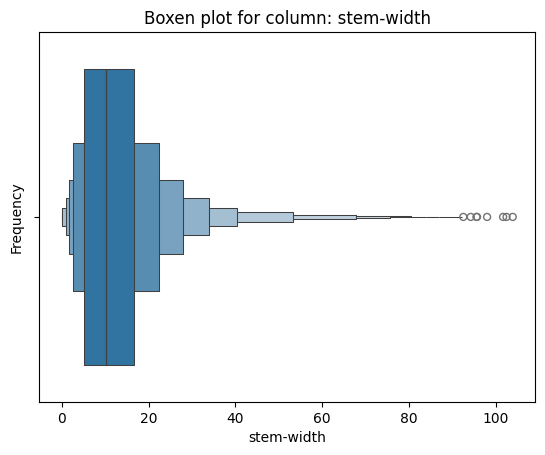

In [20]:
for col in data.select_dtypes("float64"):
    draw_boxen_plot(col)

In [21]:
le = LabelEncoder()
data["class"] = le.fit_transform(data["class"])
data["class"].unique()

array([1, 0])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [23]:
target_corr = data.select_dtypes(include= ["float64", "int64"]).corr()["class"]
target_corr

,class
cap-diameter,-0.181139
stem-height,-0.121593
stem-width,-0.197368
class,1.000000


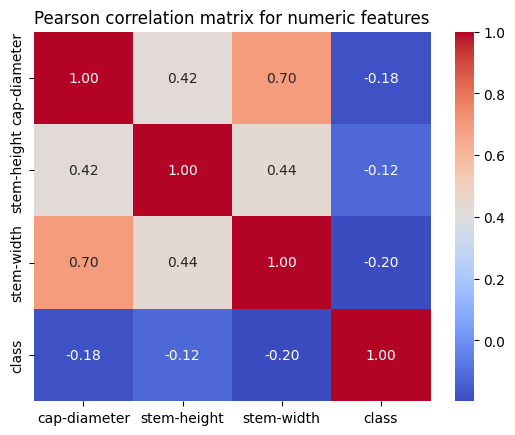

In [24]:
corr = data.select_dtypes(include= ["float64", "int64"]).corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm", fmt= ".2f")
plt.title("Pearson correlation matrix for numeric features")
plt.show();

In [25]:
data["class"].value_counts(normalize= True)

,proportion
class,
1,0.554913
0,0.445087


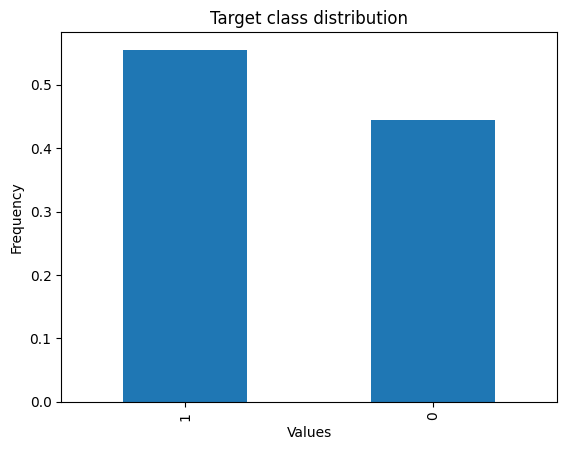

In [26]:
data["class"].value_counts(normalize= True).plot(kind= "bar", title= "Target class distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show();

## Data Cleaning & Preprocessing

In [27]:
cols_to_drop = []

threshold = 0.40

for col in data.columns:
  if (data[col].isnull().sum() / data.shape[0] >= threshold) | (data[col].nunique() == 1):
    cols_to_drop.append(col)

print(cols_to_drop)
data = data.drop(columns = cols_to_drop, axis= 1)

['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']


In [28]:
data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-color,0
stem-height,0
stem-width,0
stem-color,0


In [29]:
threshold = 0.05

for col in data.columns:
  if data[col].isnull().sum() / data.shape[0] > threshold:
    if data[col].dtype == "object":
      data[col] = data[col].fillna(data[col].mode()[0])
    else:
      data[col] = data[col].fillna(data[col].median())

In [30]:
data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0


In [31]:
data = data.dropna()

In [32]:
data.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0


In [33]:
data = data.drop_duplicates(keep= "first")
data.duplicated().sum()

np.int64(0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58452 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          58452 non-null  float64
 1   cap-shape             58452 non-null  object 
 2   cap-surface           58452 non-null  object 
 3   cap-color             58452 non-null  object 
 4   does-bruise-or-bleed  58452 non-null  object 
 5   gill-attachment       58452 non-null  object 
 6   gill-color            58452 non-null  object 
 7   stem-height           58452 non-null  float64
 8   stem-width            58452 non-null  float64
 9   stem-color            58452 non-null  object 
 10  has-ring              58452 non-null  object 
 11  ring-type             58452 non-null  object 
 12  habitat               58452 non-null  object 
 13  season                58452 non-null  object 
 14  class                 58452 non-null  int64  
dtypes: float64(3), int64(1),

## Feature Selection

In [35]:
numeric_features = ["cap-diameter", "stem-height", "stem-width"]

categorical_features = data.select_dtypes("object").columns

preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

In [36]:
X = data.drop(columns= "class", axis= 1)
y = data["class"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [38]:
print(X_train.shape)
print(X_test.shape)

(46761, 14)
(11691, 14)


In [39]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(46761, 89)
(11691, 89)


In [40]:
smote = SMOTE(random_state= 42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [41]:
select_f = SelectKBest(f_classif, k= 15)
select_f.fit(X_train_over, y_train_over)
X_train_f = select_f.transform(X_train_over)
X_test_f = select_f.transform(X_test)

print(X_train_f.shape)
print(X_test_f.shape)

(52292, 15)
(11691, 15)


In [42]:
select_mutual = SelectKBest(mutual_info_classif, k= 15)
select_mutual.fit(X_train_over, y_train_over)
X_train_mutual = select_mutual.transform(X_train_over)
X_test_mutual = select_mutual.transform(X_test)

print(X_train_mutual.shape)
print(X_test_mutual.shape)

(52292, 15)
(11691, 15)


In [43]:
log  = LogisticRegression(random_state= 42)
rfe = RFE(estimator= log, n_features_to_select= 15)
rfe.fit(X_train_over, y_train_over)
X_train_rfe = rfe.transform(X_train_over)
X_test_rfe = rfe.transform(X_test)

print(X_train_rfe.shape)
print(X_test_rfe.shape)

(52292, 15)
(11691, 15)


In [44]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(X_train_over, y_train_over)
importances = rf.feature_importances_
indicies = np.argsort(importances)[-15:]
X_train_emb = X_train_over[:, indicies]
X_test_emb = X_test[:, indicies]

print(X_train_emb.shape)
print(X_test_emb.shape)

(52292, 15)
(11691, 15)


In [45]:
def evaluate_feature_selection(X_train, X_test, y_train, y_test, model):
  if model in [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC]:
    model = model(random_state= 42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
  else:
    model = model()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

In [46]:
evaluate_feature_selection(X_train_f, X_test_f, y_train_over, y_test, LogisticRegression)

Train Accuracy: 0.7155396618985695
Test Accuracy: 0.7138824736977162


In [47]:
evaluate_feature_selection(X_train_mutual, X_test_mutual, y_train_over, y_test, LogisticRegression)

Train Accuracy: 0.7181021953644917
Test Accuracy: 0.7090924642887692


In [48]:
evaluate_feature_selection(X_train_rfe, X_test_rfe, y_train_over, y_test, LogisticRegression)

Train Accuracy: 0.6325824217853592
Test Accuracy: 0.5937045590625267


In [49]:
evaluate_feature_selection(X_train_emb, X_test_emb, y_train_over, y_test, LogisticRegression)

Train Accuracy: 0.6804100053545475
Test Accuracy: 0.6853990248909417


In [50]:
evaluate_feature_selection(X_train_over, X_test, y_train_over, y_test, LogisticRegression)

Train Accuracy: 0.7833320584410617
Test Accuracy: 0.778889744247712


### The Anova, and Mutual information have very close train and test accuracies values. The Embeded method has better train and test accuracies than Anova, and Mutual information. Although feature selection is important but after trying many feature selection techniques the best train and test accuracies lies in the normal dataset without using any feature selection method.

### We will use the Embedded Method as our Feature Selection Method.

## Model Building & Evaluation

In [51]:
log = LogisticRegression(random_state= 42, n_jobs= -1)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1],
    "max_iter": [100, 300, 500, 700, 1000]
}

grid_search = GridSearchCV(log, param_grid, cv= 5, scoring= "f1", n_jobs= -1)
grid_search.fit(X_train_emb, y_train_over)
best_params_log = grid_search.best_params_
print(best_params_log)

{'C': 1, 'max_iter': 100}


In [52]:
def model_building(model):
  if model in [LogisticRegression(C = best_params_log["C"], max_iter = best_params_log["max_iter"]), DecisionTreeClassifier, RandomForestClassifier, SVC]:
    model = model(random_state= 42)
    model.fit(X_train_emb, y_train_over)
    y_pred_train = model.predict(X_train_emb)
    y_pred = model.predict(X_test_emb)
    print(f"Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
    print()
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", fmt= "d")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    print()
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  elif model == GaussianNB:
    model = model()
    model.fit(X_train_emb.toarray(), y_train_over)
    y_pred_train = model.predict(X_train_emb.toarray())
    y_pred = model.predict(X_test_emb.toarray())
    print(f"Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
    print()
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", fmt= "d")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    print()
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  else:
    model = model()
    model.fit(X_train_emb, y_train_over)
    y_pred_train = model.predict(X_train_emb)
    y_pred = model.predict(X_test_emb)
    print(f"Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
    print()
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", fmt= "d")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    print()
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Training Accuracy: 0.6804100053545475

Testing Accuracy: 0.6853990248909417

Confusion Matrix:
[[3480 1674]
 [2004 4533]]


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      5154
           1       0.73      0.69      0.71      6537

    accuracy                           0.69     11691
   macro avg       0.68      0.68      0.68     11691
weighted avg       0.69      0.69      0.69     11691



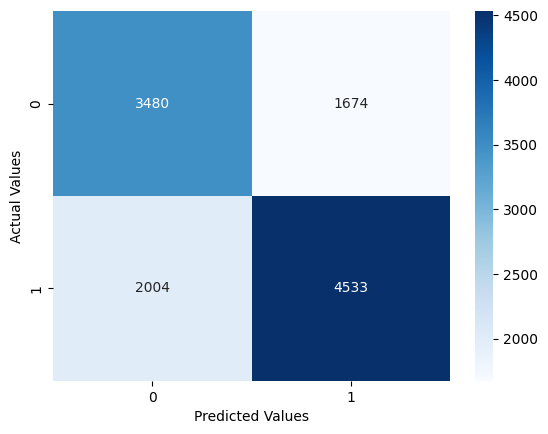

In [53]:
model_building(LogisticRegression)

Training Accuracy: 1.0

Testing Accuracy: 0.9742536994269095

Confusion Matrix:
[[5003  151]
 [ 150 6387]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5154
           1       0.98      0.98      0.98      6537

    accuracy                           0.97     11691
   macro avg       0.97      0.97      0.97     11691
weighted avg       0.97      0.97      0.97     11691



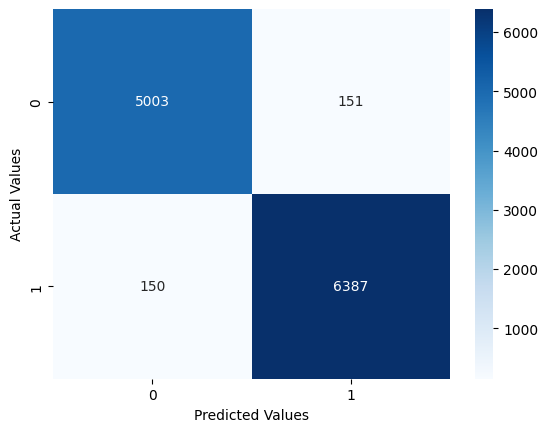

In [54]:
model_building(DecisionTreeClassifier)

Training Accuracy: 1.0

Testing Accuracy: 0.9850312205970405

Confusion Matrix:
[[5068   86]
 [  89 6448]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5154
           1       0.99      0.99      0.99      6537

    accuracy                           0.99     11691
   macro avg       0.98      0.98      0.98     11691
weighted avg       0.99      0.99      0.99     11691



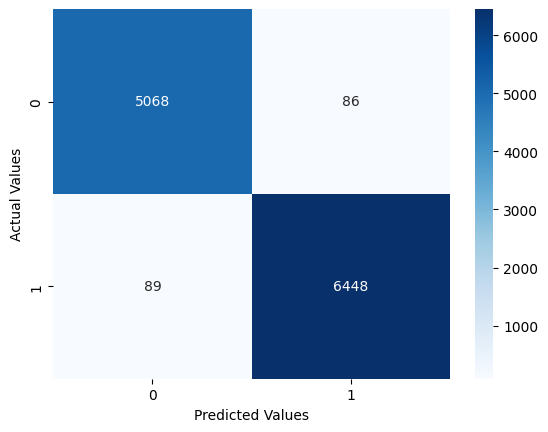

In [55]:
model_building(RandomForestClassifier)

Training Accuracy: 0.9375239042300926

Testing Accuracy: 0.9383286288598067

Confusion Matrix:
[[4723  431]
 [ 290 6247]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5154
           1       0.94      0.96      0.95      6537

    accuracy                           0.94     11691
   macro avg       0.94      0.94      0.94     11691
weighted avg       0.94      0.94      0.94     11691



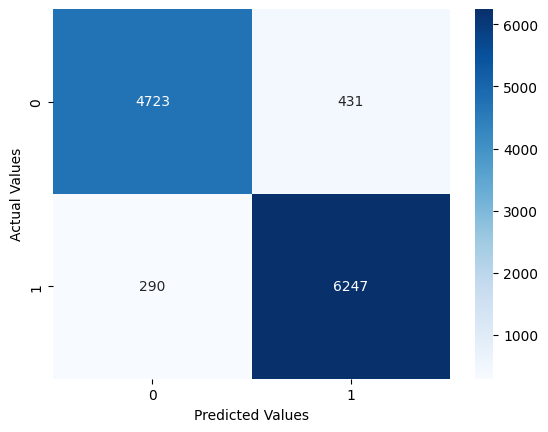

In [56]:
model_building(SVC)

Training Accuracy: 0.9890231775414977

Testing Accuracy: 0.9831494311863826

Confusion Matrix:
[[5046  108]
 [  89 6448]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5154
           1       0.98      0.99      0.98      6537

    accuracy                           0.98     11691
   macro avg       0.98      0.98      0.98     11691
weighted avg       0.98      0.98      0.98     11691



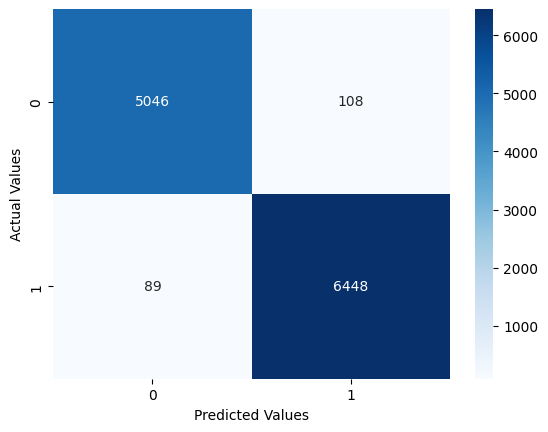

In [57]:
model_building(KNeighborsClassifier)

Training Accuracy: 0.5322229021647671

Testing Accuracy: 0.4778889744247712

Confusion Matrix:
[[5154    0]
 [6104  433]]


Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      5154
           1       1.00      0.07      0.12      6537

    accuracy                           0.48     11691
   macro avg       0.73      0.53      0.38     11691
weighted avg       0.76      0.48      0.35     11691



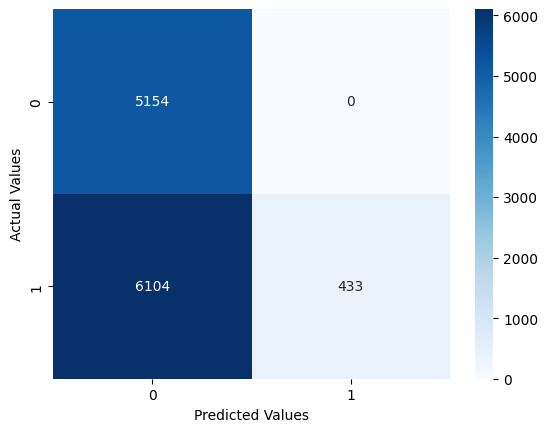

In [58]:
model_building(GaussianNB)

Training Accuracy: 0.6234223208138913

Testing Accuracy: 0.62475408433838

Confusion Matrix:
[[3055 2099]
 [2288 4249]]


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      5154
           1       0.67      0.65      0.66      6537

    accuracy                           0.62     11691
   macro avg       0.62      0.62      0.62     11691
weighted avg       0.63      0.62      0.63     11691



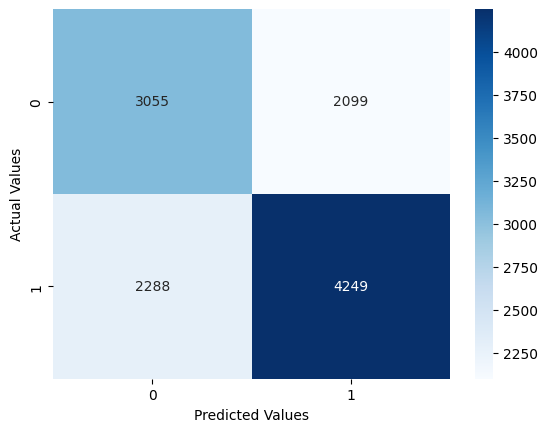

In [59]:
model_building(BernoulliNB)

In [60]:
best_models = [RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier]

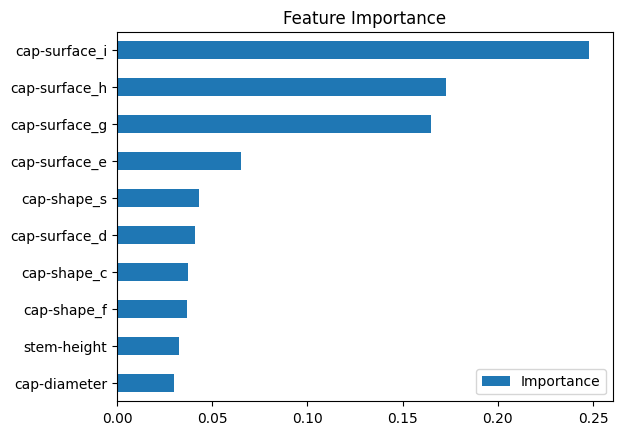

Training Accuracy: 0.9999808766159259

Testing Accuracy: 0.9727140535454624



In [61]:
rf = RandomForestClassifier(random_state= 42)

rf.fit(X_train_emb, y_train_over)
importances = rf.feature_importances_
indicies = np.argsort(importances)[-10:]

feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

df = pd.DataFrame(importances[indicies], index=np.array(feature_names)[indicies], columns=["Importance"])
df.plot(kind="barh", title="Feature Importance")
plt.show()


X_train_scaled_imp = X_train_emb[:, indicies]
X_test_scaled_imp = X_test_emb[:, indicies]

rf.fit(X_train_scaled_imp, y_train_over)

y_pred_train = rf.predict(X_train_scaled_imp)
y_pred = rf.predict(X_test_scaled_imp)
print(f"Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print()
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print()

Training Accuracy: 0.9999808766159259

Testing Accuracy: 0.9470532888546745



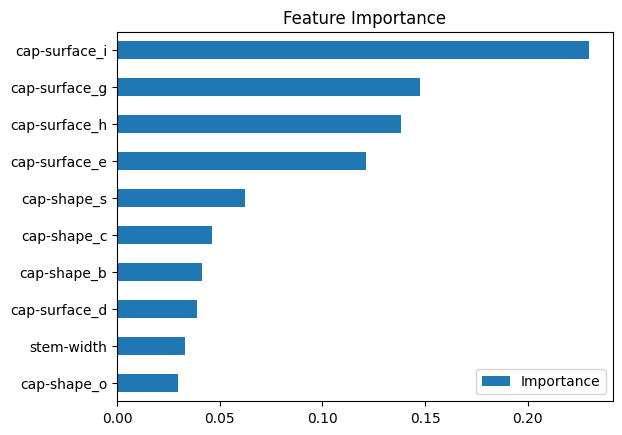

In [62]:
dt = DecisionTreeClassifier(random_state= 42)

dt.fit(X_train_emb, y_train_over)
importances = dt.feature_importances_
indicies = np.argsort(importances)[-10:]

feature_names = numeric_features + list(preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features))

df = pd.DataFrame(importances[indicies], index= np.array(feature_names)[indicies], columns= ["Importance"])
df.plot(kind= "barh", title= "Feature Importance")

X_train_scaled_imp = X_train_emb[:, indicies]
X_test_scaled_imp = X_test_emb[:, indicies]

dt.fit(X_train_scaled_imp, y_train_over)

y_pred_train = dt.predict(X_train_scaled_imp)
y_pred = dt.predict(X_test_scaled_imp)
print(f"Training Accuracy: {accuracy_score(y_train_over, y_pred_train)}")
print()
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
print()

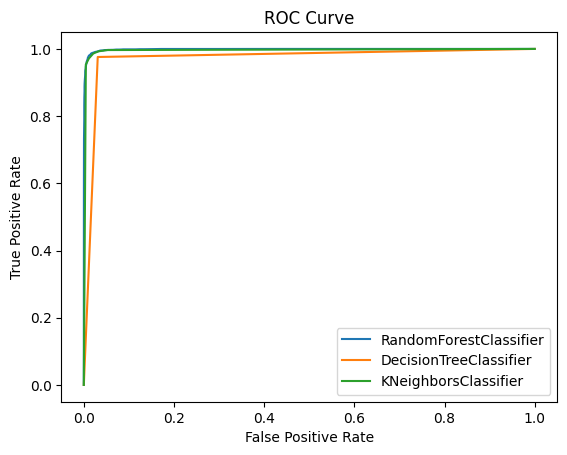

In [63]:
for model_class in best_models:
  model = model_class()
  model.fit(X_train_emb, y_train_over)
  y_pred_proba = model.predict_proba(X_test_emb)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot(fpr, tpr, label=model_class.__name__)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show();

In [64]:
models_to_save = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42).fit(X_train_emb, y_train_over),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42).fit(X_train_emb, y_train_over),
    "KNeighborsClassifier": KNeighborsClassifier().fit(X_train_emb, y_train_over)
}

for name, model in models_to_save.items():
    filename = f"{name}.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved {name} to {filename}")

Saved RandomForestClassifier to RandomForestClassifier.pkl
Saved DecisionTreeClassifier to DecisionTreeClassifier.pkl
Saved KNeighborsClassifier to KNeighborsClassifier.pkl


In [65]:
loaded_models = {}
for name in models_to_save.keys():
    filename = f"{name}.pkl"
    with open(filename, "rb") as f:
        loaded_models[name] = pickle.load(f)
    print(f"Loaded {name} from {filename}")

print("\nEvaluating loaded models:")
for name, model in loaded_models.items():
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test_emb)
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Loaded RandomForestClassifier from RandomForestClassifier.pkl
Loaded DecisionTreeClassifier from DecisionTreeClassifier.pkl
Loaded KNeighborsClassifier from KNeighborsClassifier.pkl

Evaluating loaded models:

--- RandomForestClassifier ---
Testing Accuracy: 0.9850312205970405
Confusion Matrix:
[[5068   86]
 [  89 6448]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5154
           1       0.99      0.99      0.99      6537

    accuracy                           0.99     11691
   macro avg       0.98      0.98      0.98     11691
weighted avg       0.99      0.99      0.99     11691


--- DecisionTreeClassifier ---
Testing Accuracy: 0.9742536994269095
Confusion Matrix:
[[5003  151]
 [ 150 6387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5154
           1       0.98      0.98      0.98      6537

    accuracy              